# Gathering data from example databases

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels .stats.outliers_influence import variance_inflation_factor
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

%matplotlib inline

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

The Boston DataSet was orignally fetched from a research paper, you can find it [here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [5]:
dir(boston_dataset) 

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Data points and features


In [7]:
type(boston_dataset.data)

numpy.ndarray

In [8]:
boston_dataset.data.shape

(506, 13)

In [9]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
boston_dataset.target # This data is the prices of houses in Boston in thousands.

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Exploring data with pandas Dataframes

In [11]:
# Creating dataFrame using pandas
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add a column with price
data["Price"] = boston_dataset.target

In [12]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [13]:
# to print the few top rows of the datset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
# to print the few botton rows of the datset
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [15]:
# To check number of enteries per column
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
Price      506
dtype: int64

# Cleaning Data to Check Missing Values

In [16]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
Price      False
dtype: bool

In [17]:
data.info() # to check whether we have null places in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Visualizing Data, Histogram

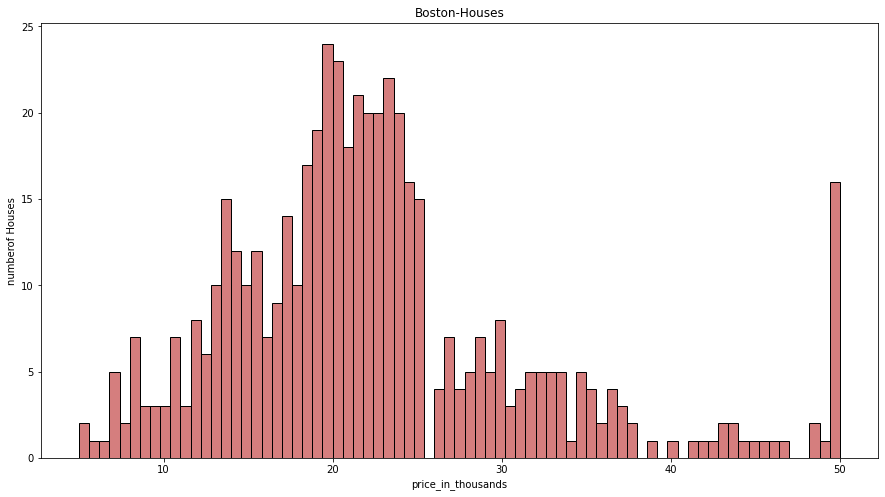

In [18]:
plt.figure(figsize=(15,8))
plt.hist(data['Price'], bins=75, ec='black', color='#D57E7E')
plt.xlabel('price_in_thousands')
plt.ylabel('numberof Houses')
plt.title('Boston-Houses')
plt.show()

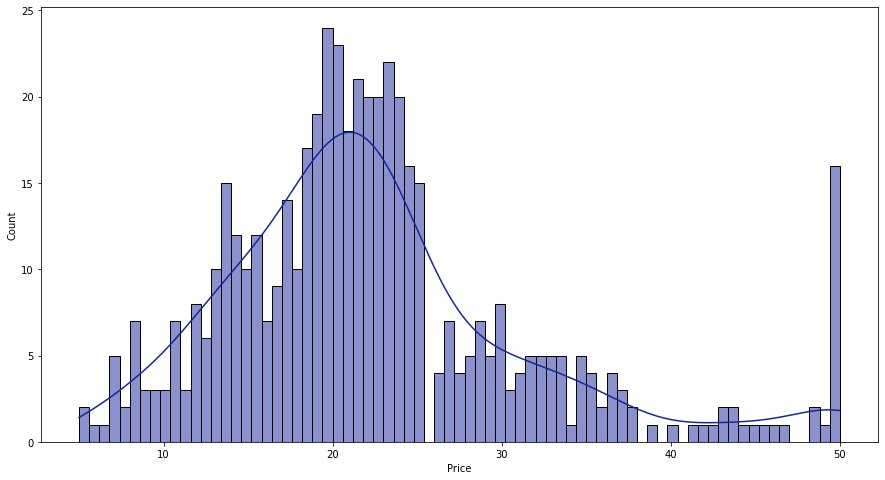

In [19]:
plt.figure(figsize=(15,8))
sns.histplot(data['Price'], bins=75, kde=True, color='#14279B') # older version has distplot but now it has histplot
plt.show()

# To visuialize the no. of rooms available in boston

Text(0, 0.5, 'No. of rooms')

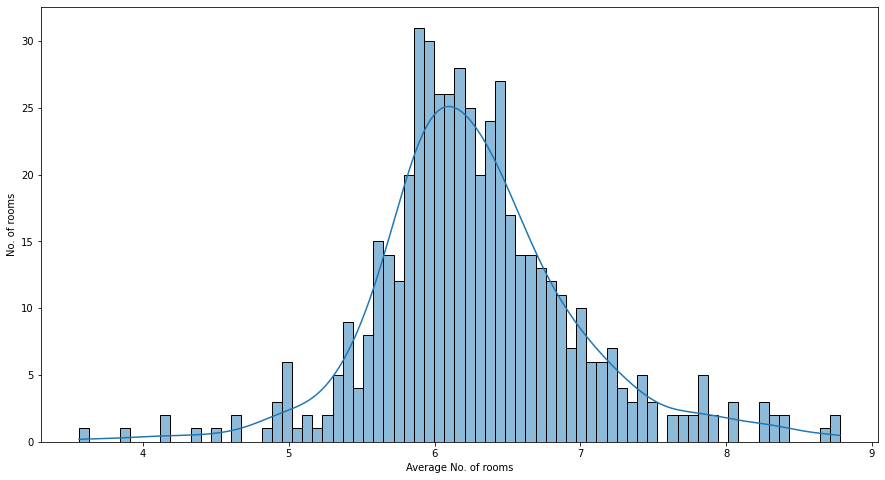

In [20]:
plt.figure(figsize=(15,8))
rooms = data['RM'] 
sns.histplot(rooms, bins=75, kde=True)
plt.xlabel('Average No. of rooms')
plt.ylabel('No. of rooms')

In [21]:
rooms.mean() # to get the average no. of rooms in boston

6.284634387351779

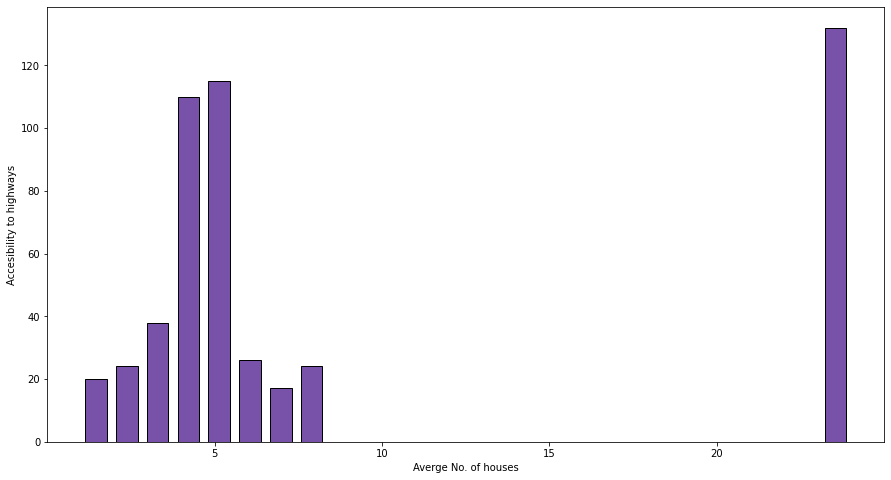

In [22]:
plt.figure(figsize=(15,8))
plt.hist(data['RAD'],rwidth=0.7, ec='black',bins=25 , color='#7851a9')
plt.ylabel('Accesibility to highways')
plt.xlabel('Averge No. of houses')
plt.show()

In [23]:
data["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

### RAD has index values, so we can visualize the data using bar graph

In [24]:
frequency = data['RAD'].value_counts() # frequency of rooms near to the highway
type(frequency)
frequency.index

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64')

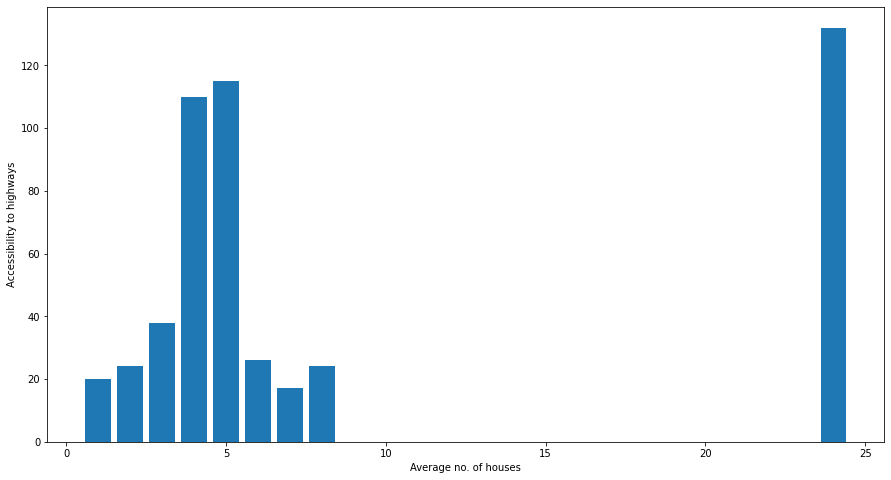

In [25]:
plt.figure(figsize=(15, 8))
plt.bar(frequency.index, height=frequency)
plt.xlabel('Average no. of houses')
plt.ylabel('Accessibility to highways')
plt.show()

In [26]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

# Descriptive Statistics

In [27]:
data.describe() # to get description of data(max, min, median, mean, standard, ...etc)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation
## $$ \rho _{XY} = corr(X,Y) $$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [28]:
data['Price'].corr(data['RM'])

0.6953599470715396

In [29]:
data['Price'].corr(data['PTRATIO'])

-0.5077866855375618

# Visualizing the correlation in our dataframe

In [30]:
data.corr() # correlation between in all th columns.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


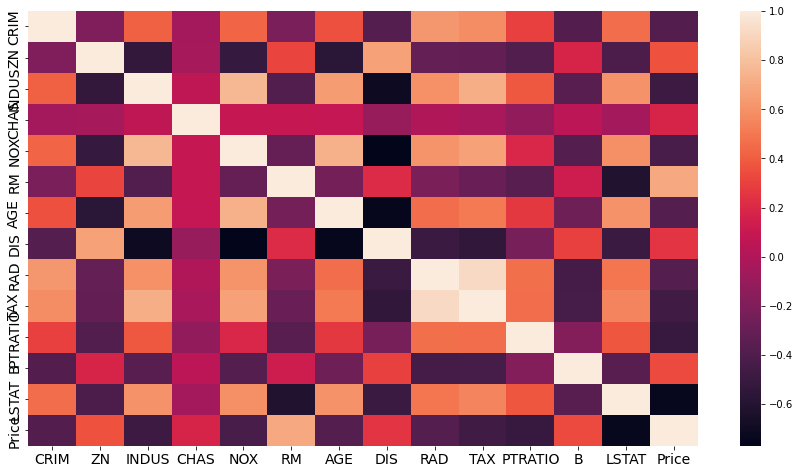

In [31]:
# Actual total correlation in our dataset visually
plt.figure(figsize=(15,8))
sns.heatmap(data.corr())
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [32]:
# to filter out useless data
mask = np.zeros_like(data.corr()) # put zeros to the values which are unnecessary i.e. corr with their own.
tri_indices = np.triu_indices_from(mask) # to get those values which are in above triangle(above 1.00 value)
mask[tri_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

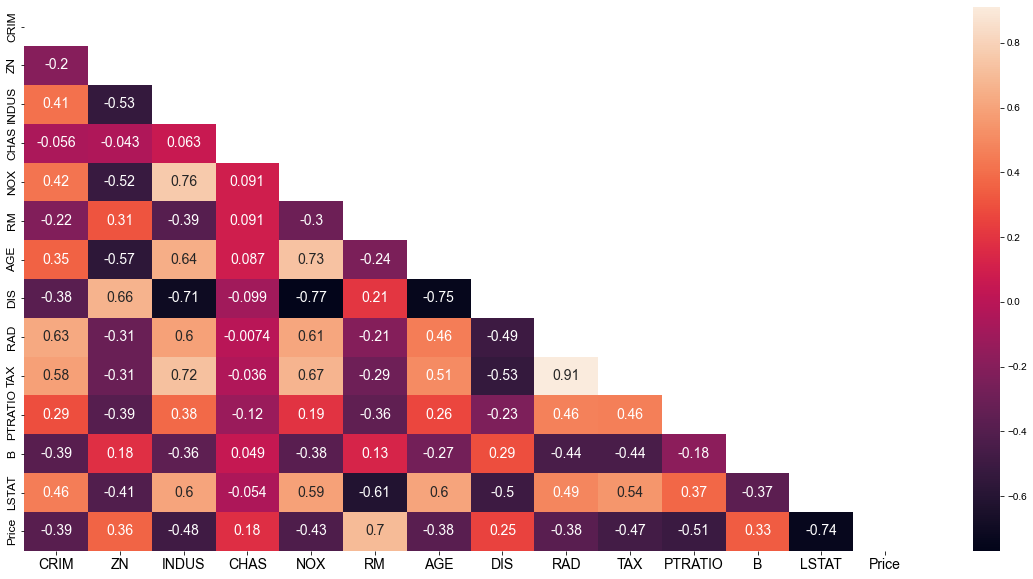

In [33]:
# Actual total correlation in our dataset visually after removing useless values
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size':14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

# Scatter plot between distance & pollution


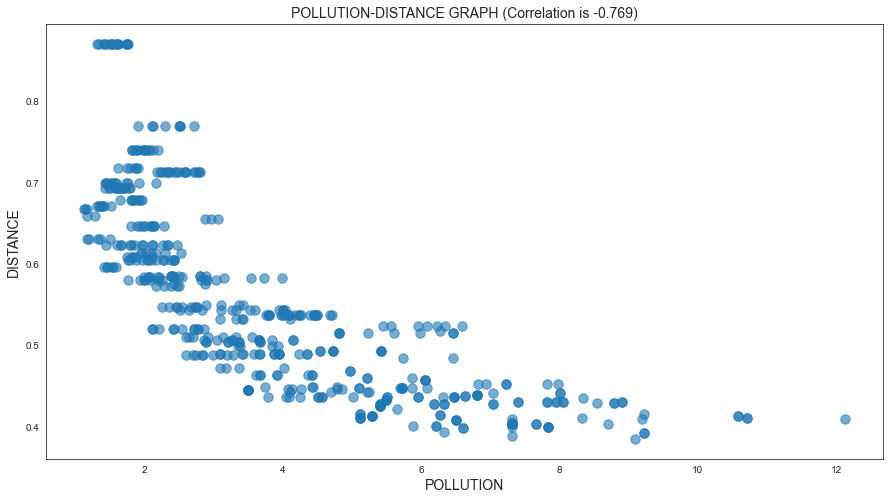

In [34]:

plt.figure(figsize=(15,8))
y = data['NOX']
x = data['DIS']

corr_dis_nox = round(x.corr(y), 3)


plt.scatter(x, y, alpha=0.6, s=90)
plt.ylabel('DISTANCE', fontsize=14)
plt.xlabel('POLLUTION', fontsize=14)
plt.title(f'POLLUTION-DISTANCE GRAPH (Correlation is {corr_dis_nox})', fontsize=14)
plt.show()

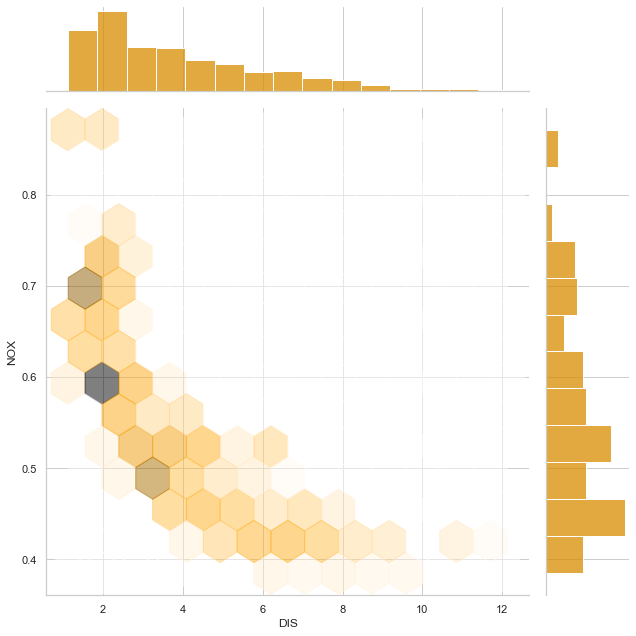

In [35]:
sns.set()
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], height=9,kind='hex',color='#D98C00', joint_kws={"alpha":0.5})
plt.show()

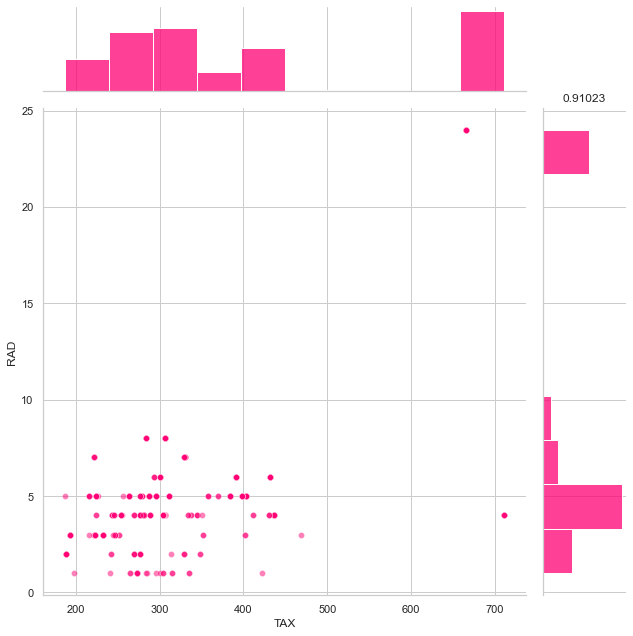

In [36]:
corr_rad_tax =round(data['TAX'].corr(data['RAD']), 5)
sns.set()
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], height=9,color='#FF0075', joint_kws={"alpha":0.5})
plt.title(f'{corr_rad_tax}')
plt.show()

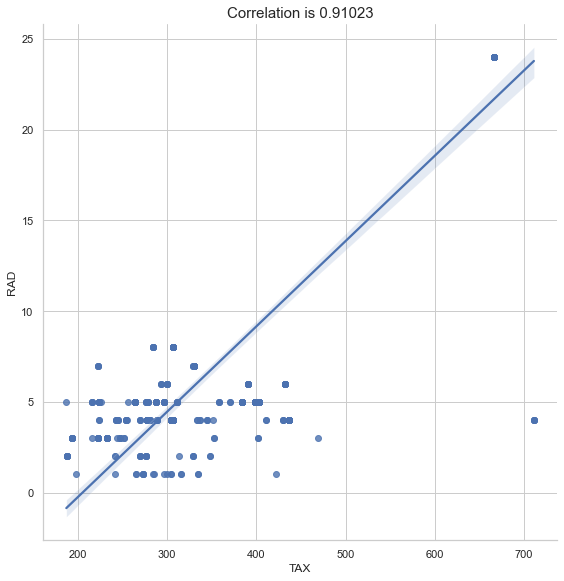

In [37]:
sns.lmplot(x='TAX', y='RAD', data=data, height=8)
plt.title(f'Correlation is {corr_rad_tax}',fontsize=15)
plt.show()

# Visualizing the Prices with all other params given in the dataset

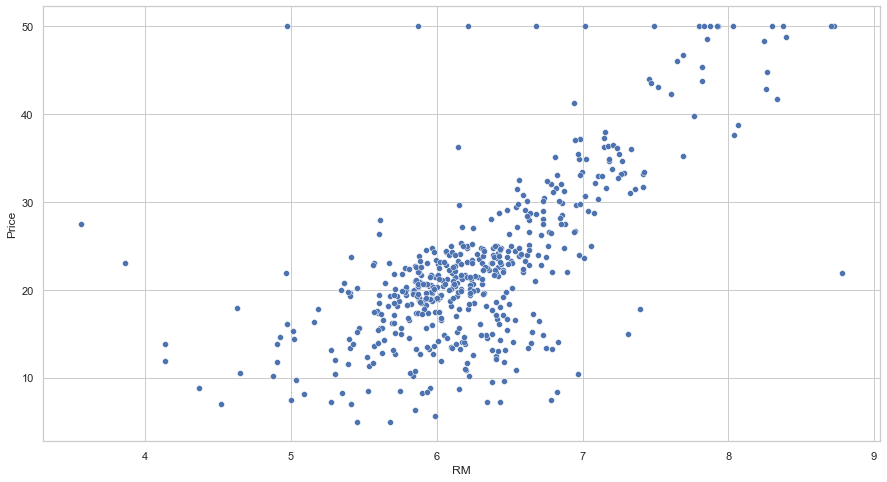

In [38]:
# Price with RM
correlation = round(data['RM'].corr(data['Price']), 4)
plt.figure(figsize=(15,8))
sns.scatterplot(x=data['RM'], y=data['Price'])
plt.show()

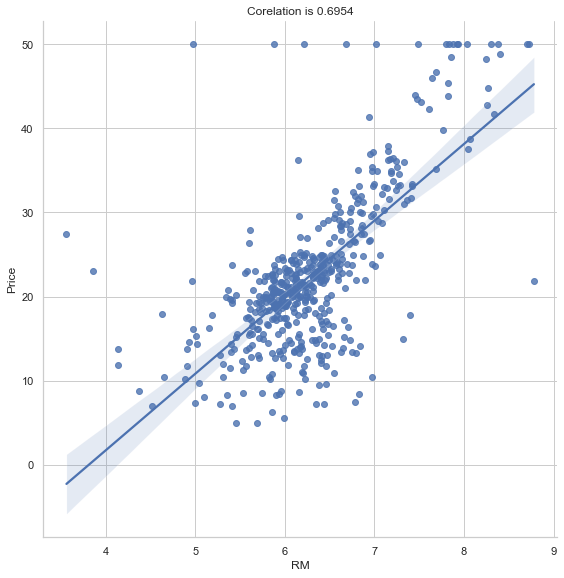

In [39]:
sns.lmplot(x='RM', y='Price', data=data, height=8)
plt.title(f'Corelation is {correlation}')
plt.show()

In [40]:
%%time

#sns.pairplot(data)
#plt.show()

Wall time: 0 ns


In [41]:
%%time

#sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
#plt.show()

Wall time: 0 ns


# Multivariable Regression
## Training & testing

In [42]:
# Take temporary data
prices = data['Price']
features = data.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, 
                                                    random_state=10)
# % of training dataset
len(X_train)/len(features)

# % of testing dataset 
X_test.shape[0]/features.shape[0]


0.2015810276679842

## Multivariable regression

In [43]:
# Linear Regression

reg = LinearRegression()
reg.fit(X_train, y_train)

print("Intercept ",reg.intercept_,'\n')

# Training data set score
print("RSS of Training Dataset ",reg.score(X_train, y_train),'\n')

# Testing dataset Score
print('RSS of Testing Dataset ',reg.score(X_test, y_test))

# to check regression  the prices with other params
pd.DataFrame(data=reg.coef_, index=X_train.columns, columns=['coef'])


Intercept  36.53305138282457 

RSS of Training Dataset  0.750121534530608 

RSS of Testing Dataset  0.6709339839115638


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Data Transformation

In [44]:
data['Price'].skew() # histograms with spike values at the edges are called skewed

1.1080984082549072

In [45]:
# TO make our data fit in our linear model, we need to pull our values closer using log() which dose'nt mislead our data
y_log = np.log(data['Price'])
y_log

0      3.178054
1      3.072693
2      3.546740
3      3.508556
4      3.589059
         ...   
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: Price, Length: 506, dtype: float64

In [46]:
y_log.skew()

-0.33032129530987864

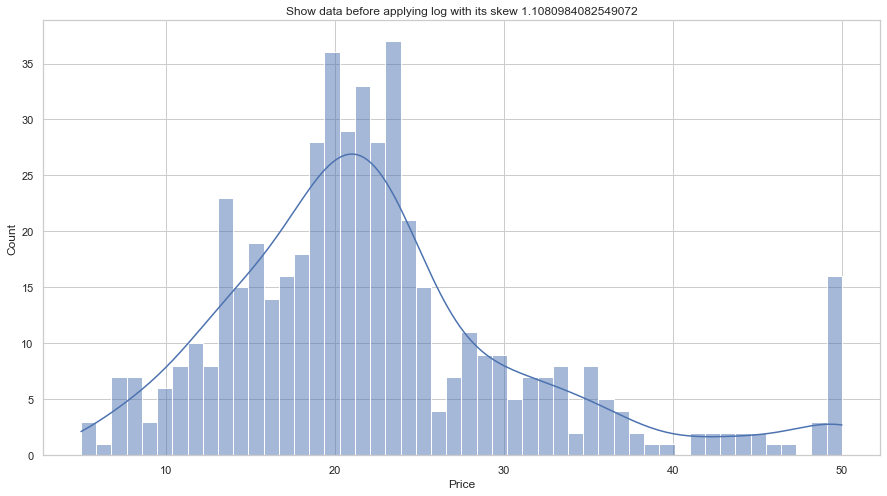

In [47]:
plt.figure(figsize=(15,8)) 
sns.histplot(data['Price'], bins=50, kde=True)
plt.title(f"Show data before applying log with its skew {data['Price'].skew()}")

plt.show()

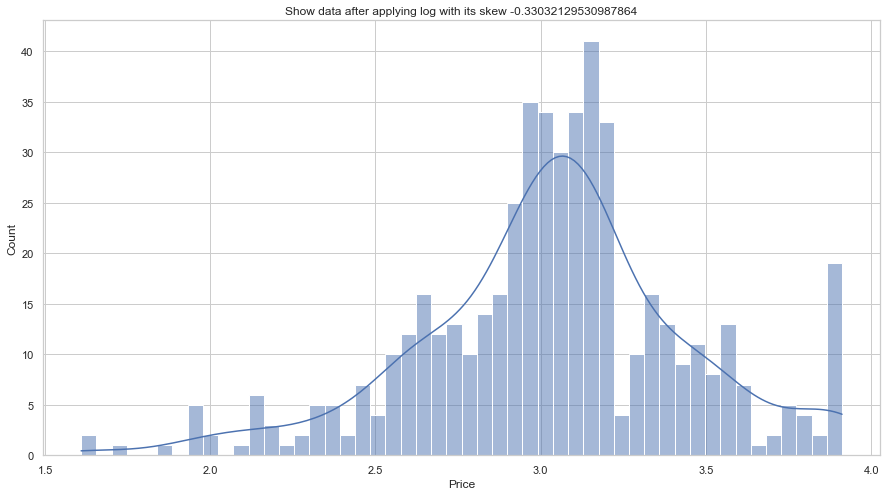

In [48]:
plt.figure(figsize=(15,8)) 
sns.histplot(y_log, bins=50, kde=True)
plt.title(f"Show data after applying log with its skew {y_log.skew()}")

plt.show()

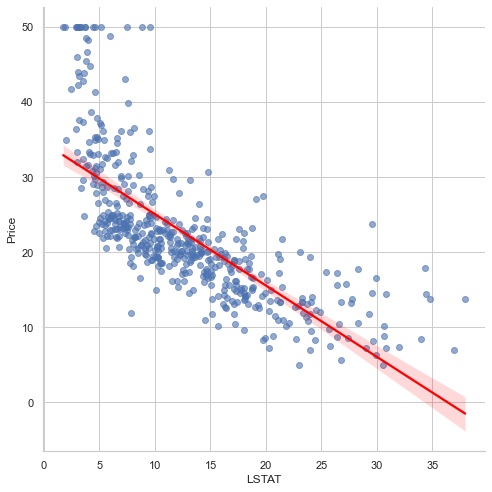

In [49]:
sns.lmplot(x='LSTAT', y='Price', data=data, height=7, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.show()

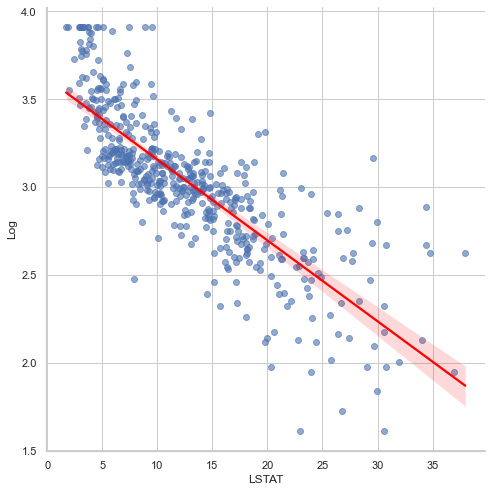

In [50]:
Transformed_data = features
Transformed_data['Log'] = y_log
sns.lmplot(x='LSTAT', y='Log', data=Transformed_data, height=7, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.show()

## Regression with Log Values of Price

In [51]:
# Take temporary data
prices = np.log(data['Price'])
features = data.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, 
                                                    random_state=10)
# % of training dataset
len(X_train)/len(features)

# % of testing dataset 
X_test.shape[0]/features.shape[0]


0.2015810276679842

In [52]:
# Linear Regression

reg = LinearRegression()
reg.fit(X_train, y_train)

print("Intercept ",reg.intercept_,'\n')

# Training data set score
print("RSS of Training Dataset ",reg.score(X_train, y_train),'\n')

# Testing dataset Score
print('RSS of Testing Dataset ',reg.score(X_test, y_test))

# to check regression  the prices with other params
pd.DataFrame(data=reg.coef_, index=X_train.columns, columns=['coef'])

Intercept  4.059943871775209 

RSS of Training Dataset  0.7930234826697584 

RSS of Testing Dataset  0.7446922306260745


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


## P-values and Evaluating Coefficients

In [53]:
x_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, x_incl_const)
result = model.fit()


# result.params

pd.DataFrame({'coef':result.params, 'p-values':round(result.pvalues, 4)})

# P-values are calculated to check whether the features of the dataset are statistically significant or not
# If the p-values are > 0.05, then they are not significant i.e. they do not have much
# impact in our target values with their existence


,coef,p-values
const,4.059944,0.0000
CRIM,-0.010672,0.0000
ZN,0.001579,0.0086
INDUS,0.002030,0.4445
CHAS,0.080331,0.0382
NOX,-0.704068,0.0000
RM,0.073404,0.0001
AGE,0.000763,0.2092
DIS,-0.047633,0.0000
RAD,0.014565,0.0000


In [54]:
# INDUS & AGE are not significant

## Testing for Multicollinearity

$$ TAX = \alpha _0 + \alpha _1 CRIM + \alpha_2 ZN + ............+\alpha_{12} LSTAT $$
$$ VIF_{TAX} =  \frac{1} {(1 - R_{TAX}^2)} $$

In [55]:
variance_inflation_factor(x_incl_const.values, 1)

1.7145250443932485

In [56]:
vif = []
for i in range(len(x_incl_const.columns)):
    result = variance_inflation_factor(x_incl_const.values, i)
    vif.append(round(result, 4))

pd.DataFrame({'coef_name':x_incl_const.columns,
                     'vif': vif})

# If VIF Testing results with values more than 10, then we have to take care of multicollinearity in our dataset
# If not, then multicollinearity will not affect major changes in our model

,coef_name,vif
0,const,597.5487
1,CRIM,1.7145
2,ZN,2.3328
3,INDUS,3.9434
4,CHAS,1.0788
5,NOX,4.4103
6,RM,1.8404
7,AGE,3.3268
8,DIS,4.2229
9,RAD,7.3143


## Model Simplification & Basiyan Informtion Criterion (BIC)

In [57]:
# Orignal model with all the features
x_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, x_incl_const)
result = model.fit()

orignal_coef = pd.DataFrame({'coef':result.params, 'p-values':round(result.pvalues, 4)})

print("BIC value :",result.bic)
print("RSS value :",result.rsquared)

BIC value : -139.74997769478898
RSS value : 0.7930234826697583


In [58]:
# Reducaed Model removing AGE , INDUS feature

reduced_model = X_train.drop(['AGE', 'INDUS'], 1)

x_incl_const = sm.add_constant(reduced_model)
model = sm.OLS(y_train, x_incl_const)
result = model.fit()

orignal_minus_coef = pd.DataFrame({'coef':result.params, 'p-values':round(result.pvalues, 4)})

print("BIC value :",result.bic)
print("RSS value :",result.rsquared)

BIC value : -149.49934294224678
RSS value : 0.7918657661852815


## Residual and Residual Plots

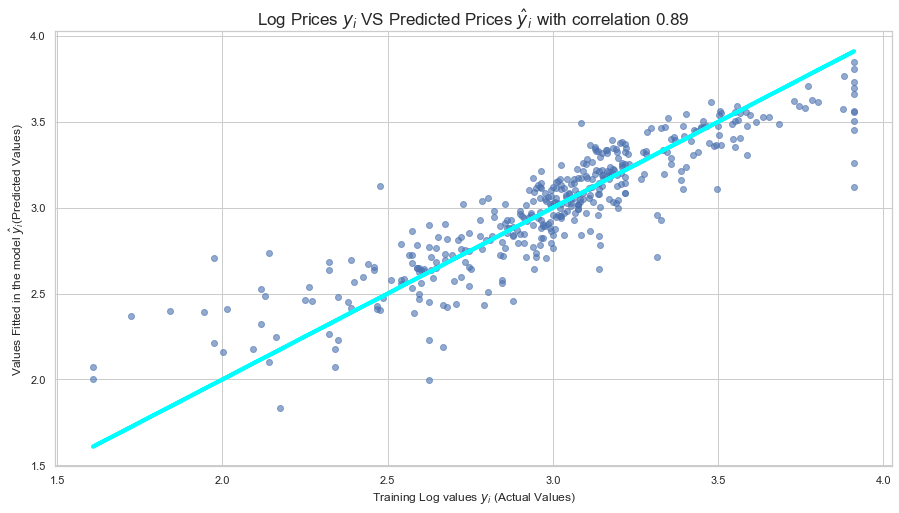

In [59]:
# Modified model:  data tranforming with log and dropping two features
prices = np.log(data['Price'])
features = data.drop(['Price', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, 
                                                    random_state=10)

# StatsModel use

x_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, x_incl_const)
result = model.fit()

# Residuals
# residuals = y_train - result.fittedvalues   -> manual
# result.resid

# Graph of Actual vs Residual

corr = round(y_train.corr(result.fittedvalues), 3)

plt.figure(figsize=(15, 8))
plt.scatter(y_train, result.fittedvalues, alpha=0.6)
plt.plot(y_train, y_train, color='cyan', linewidth=4)
plt.xlabel('Training Log values $y _i$ (Actual Values)', fontsize=12)
plt.ylabel('Values Fitted in the model $ \hat y_i $(Predicted Values)', fontsize=12)
plt.title(f'Log Prices $y _i$ VS Predicted Prices $ \hat y_i$ with correlation {corr}', fontsize=17)

plt.show()

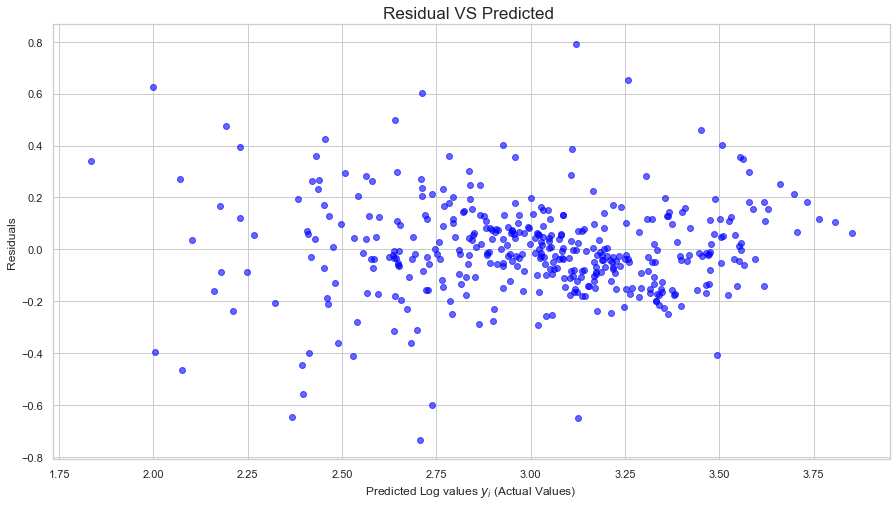

In [60]:
# Residual VS Predicted
plt.figure(figsize=(15, 8))
plt.scatter(result.fittedvalues, result.resid, alpha=0.6, c='blue')
plt.xlabel('Predicted Log values $y _i$ (Actual Values)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title(f'Residual VS Predicted ', fontsize=17)
plt.show()


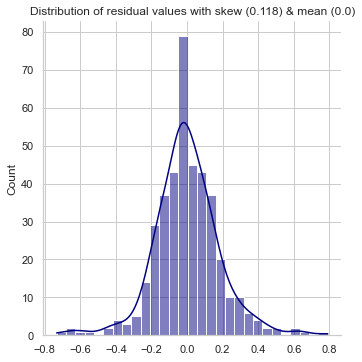

In [61]:
# Distribution analysis-> checking for normality in our residual values
# A normal distribution consists of skew=0 and mean=0 of residual values

resid_mean = round(result.resid.mean(), 3)
resid_skew = round(result.resid.skew(), 3)

sns.displot(result.resid, kde='true', color='navy')
plt.title(f'Distribution of residual values with skew ({resid_skew}) & mean ({resid_mean})')
plt.show()

In [62]:
# Check MSE & RSS of all the possible models

#########################
# Orignal Model
prices = data['Price']
features = data.drop(['Price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, 
                                                    random_state=10)
# StatsModel use

x_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, x_incl_const)
result = model.fit()

mse_og = round(result.mse_resid, 3)
rss_og = round(result.rsquared, 3)

########################
# Modified log model with dropping specific features
prices = np.log(data['Price'])
features = data.drop(['Price', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, 
                                                    random_state=10)
# StatsModel use

x_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, x_incl_const)
result = model.fit()

mse_log = round(result.mse_resid, 3)
rss_log = round(result.rsquared, 3)

########################
# Reduced log model with dropping some features
prices = np.log(data['Price'])
features = data.drop(['Price', 'INDUS', 'AGE', 'LSTAT', 'CRIM', 'ZN', 'NOX'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, 
                                                    random_state=10)
# StatsModel use

x_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, x_incl_const)
result = model.fit()

mse_log_omit = round(result.mse_resid, 3)
rss_log_omit = round(result.rsquared, 3)


analysis = pd.DataFrame({'MSE': [mse_log, mse_log_omit, mse_og], 'RSS':[rss_log, rss_log_omit, rss_og],
                        'RMSE': [np.sqrt(mse_log), np.sqrt(mse_log_omit), np.sqrt(mse_og)] },
                       index=['Modified Log Values', 'Reduced Log Values', 'Orignal Values'])
analysis

,MSE,RSS,RMSE
Modified Log Values,0.035,0.792,0.187083
Reduced Log Values,0.068,0.592,0.260768
Orignal Values,19.921,0.750,4.463295


#### This tells us that our modified log model with specific features dropped is the best fitted for our dataset as it gives least error of 0.035 with satisfied r-squared value i.e. 0.792

In [63]:
print(' 1 std deviation is', np.sqrt(mse_log))
print(' 2 std deviation is', 2*np.sqrt(mse_log))


# Prediction for upper bound of $ 30000 house
upper_bound = np.log(30000) + 2*np.sqrt(mse_log)
print('The Upper Bound prediction for 95% prediction interval is : $', np.e**(upper_bound)) #as upper bound is in log

# Prediction for lower bound of $ 30000 house
lower_bound = np.log(30000) - 2*np.sqrt(mse_log)
print('The Upper Bound prediction for 95% prediction interval is : $', np.e**(lower_bound)) #as lower bound is in log

 1 std deviation is 0.18708286933869708
 2 std deviation is 0.37416573867739417
The Upper Bound prediction for 95% prediction interval is : $ 43613.342332399385
The Upper Bound prediction for 95% prediction interval is : $ 20635.88690682414


In [64]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [1]:
## Getting module import
import boston_valuation as val

In [3]:
val.get_price_estimate(10, 25, 25, True, False)

Upper Bound in dollar is : $ 1013800.0
Actual estimation in dollar is : $ 840500.0
Lower Bound in dollar is : $ 696800.0
Interval is 68
